In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
ds = pd.read_csv('Social_Network_Ads.csv')

In [3]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
User ID            400 non-null int64
Gender             400 non-null object
Age                400 non-null int64
EstimatedSalary    400 non-null int64
Purchased          400 non-null int64
dtypes: int64(4), object(1)
memory usage: 15.7+ KB


In [4]:
ds.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
User ID,400.0,1.569154e+07,71658.321581,15566689.0,15626763.75,15694341.5,15750363.0,15815236.0
Age,400.0,3.765500e+01,10.482877,18.0,29.75,37.0,46.0,60.0
EstimatedSalary,400.0,6.974250e+04,34096.960282,15000.0,43000.00,70000.0,88000.0,150000.0
Purchased,400.0,3.575000e-01,0.479864,0.0,0.00,0.0,1.0,1.0


In [5]:
ds[:2]

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0


In [6]:
ds.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


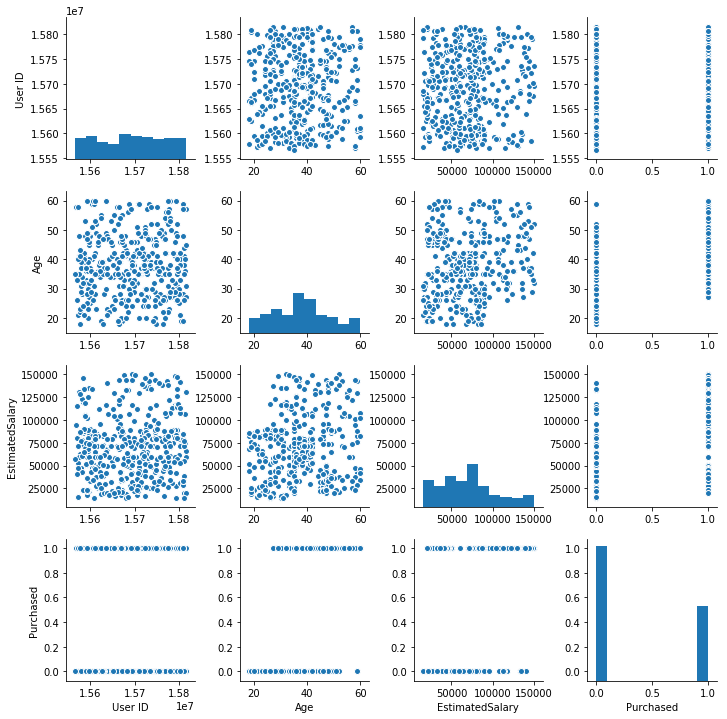

In [7]:
sns.pairplot(ds)

In [8]:
ds[:2]

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0


# Create dummies for categorical values

In [9]:
Sex = pd.get_dummies(ds.iloc[:,1])

In [10]:
Sex[:2]

,Female,Male
0,0,1
1,0,1


In [12]:
ds = pd.concat([ds,Sex],axis=1)

In [13]:
ds[:2]

,User ID,Gender,Age,EstimatedSalary,Purchased,Female,Male
0,15624510,Male,19,19000,0,0,1
1,15810944,Male,35,20000,0,0,1


# Avioding Dummy value trap

In [16]:
X = ds.iloc[:,[5,2,3]].values

In [17]:
X[:2]

array([[    0,    19, 19000],
       [    0,    35, 20000]], dtype=int64)

In [18]:
y = ds.iloc[:,4].values

# Apply Feature Scaling

In [19]:
from sklearn.preprocessing import StandardScaler

In [20]:
sc = StandardScaler()

In [21]:
X_sc = sc.fit_transform(X)

C:\Users\david\Anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


# Apply PCA

In [22]:
from sklearn.decomposition import PCA

In [23]:
pca_none = PCA(n_components=None)

In [24]:
X_pca_none = pca_none.fit_transform(X)

In [25]:
X_pca_none[:2]

array([[ -5.07425008e+04,  -1.62346061e+01,   4.13746809e-01],
       [ -4.97425001e+04,  -2.82415213e-01,   4.64981886e-01]])

In [26]:
pca_none.explained_variance_ratio_

array([  9.99999908e-01,   9.22443397e-08,   2.13783666e-10])

In [27]:
#PCA1 explains 99% of the data

# Create PCA with n_components as 1

In [29]:
pca_1 = PCA(n_components=1)

In [30]:
X_pca_1 = pca_1.fit_transform(X)

# Split data into training set and test set

In [31]:
from sklearn.model_selection import train_test_split

In [32]:
X_train,X_test,y_train,y_test = train_test_split(X_pca_1,y,test_size=0.2,random_state=0)

# 1. Logistic Regression

In [33]:
from sklearn.linear_model import LogisticRegression

In [34]:
classifier_lr = LogisticRegression(random_state=0)

In [35]:
classifier_lr.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=0, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [36]:
y_pred_lr = classifier_lr.predict(X_test)

In [37]:
# Analyze the prediction using confusion matrix

In [38]:
from sklearn.metrics import confusion_matrix

In [39]:
cm_lr = confusion_matrix(y_test,y_pred_lr)

In [40]:
cm_lr

array([[32, 26],
       [ 7, 15]], dtype=int64)

# 2. Kernel SVM

In [41]:
from sklearn.svm import SVC

In [42]:
classifier_svc_kernel = SVC(kernel='rbf',random_state=0)

In [43]:
classifier_svc_kernel.fit(X_train,y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=0, shrinking=True,
  tol=0.001, verbose=False)

In [44]:
y_pred_kernel_svm = classifier_svc_kernel.predict(X_test)

In [45]:
# Analyze the prediction using confusion matrix

In [46]:
cm_kernel_svm = confusion_matrix(y_test,y_pred_kernel_svm)

In [47]:
cm_kernel_svm

array([[48, 10],
       [14,  8]], dtype=int64)